In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

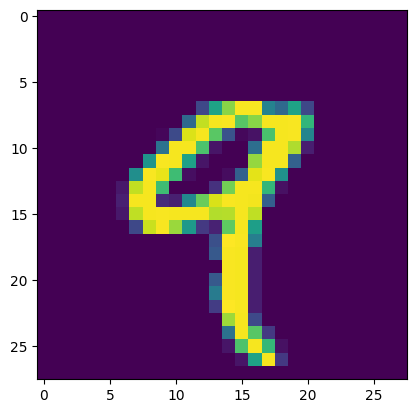

In [6]:
plt.imshow(x_train[4])

In [7]:
y_train[4]

9

In [12]:
x_train.shape

(60000, 28, 28)

In [15]:
x_train = x_train/255
x_test = x_test/255

In [16]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
x_train_flattened = x_train.reshape(len(x_train) , 28*28)
x_train_flattened.shape

(60000, 784)

In [18]:
x_test_flattened = x_test.reshape(len(x_test) , 28*28)
x_test_flattened.shape

(10000, 784)

In [21]:
model = keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(784,) , activation='sigmoid')
])

model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy' ,
    metrics = ['accuracy']
)

model.fit(x_train_flattened , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4670 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3038 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2832 - accuracy: 0.9219
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2731 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9259


In [22]:
model.evaluate(x_test_flattened , y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2708 - accuracy: 0.9249


[0.27083897590637207, 0.9248999953269958]

In [23]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.0367607e-02, 2.8256173e-07, 5.2380417e-02, 9.5678449e-01,
       2.9869445e-03, 1.0861385e-01, 1.4250031e-06, 9.9983501e-01,
       7.5686239e-02, 5.9834057e-01], dtype=float32)

In [25]:
import numpy as np
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:4]

[7, 2, 1, 0]

In [26]:
cm = tf.math.confusion_matrix(labels = y_test , predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    4,    7,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    2,    4,    2,   11,    0],
       [   7,    8,  922,   20,    9,    4,   13,   10,   36,    3],
       [   2,    0,   15,  932,    0,   22,    3,   12,   16,    8],
       [   1,    1,    2,    1,  932,    0,   12,    4,    6,   23],
       [   9,    2,    2,   37,   11,  769,   20,    9,   27,    6],
       [  10,    3,    4,    1,    7,    9,  921,    2,    1,    0],
       [   1,    5,   20,    9,    8,    0,    0,  958,    3,   24],
       [   8,    5,    6,   29,   10,   33,   12,   14,  850,    7],
       [  11,    7,    1,   13,   40,    7,    0,   37,    2,  891]])>

Text(95.72222222222221, 0.5, 'Truth')

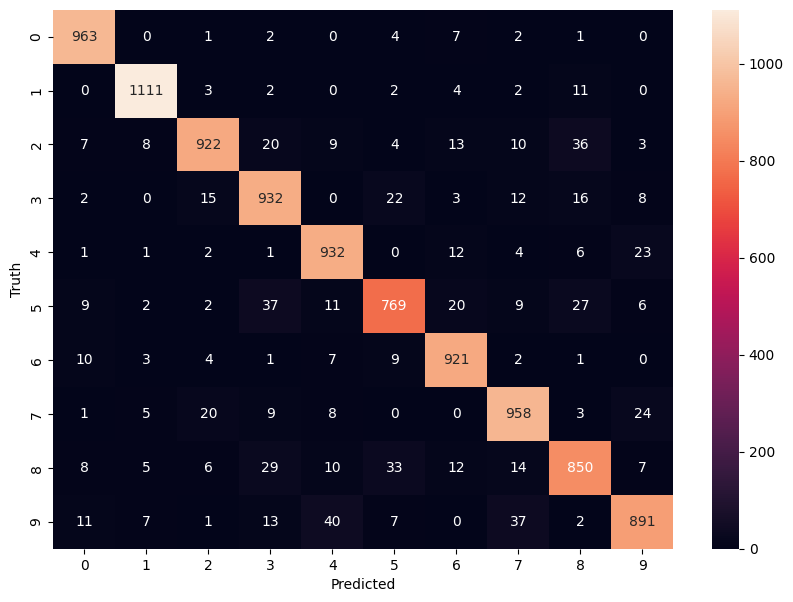

In [27]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm , annot=True , fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")